## Analizy epidemiologiczne i prognozy medyczne
Projekt grupowy: Agata, Katarzyna, Piotr.


**<center>Analiza modelu Lotki-Volterry</center>**
Model Lotki-Volterry jest pierwszym w historii modelem opisującym odziaływania dwóch populacji w ekosystemie. Zakładamy, że w jednym ekosystemie występują dwa gatunki, z czego osobniki pierwszego stanowią pożywienie dla drugiego. Przez V(t) oznaczmy liczebność ofiar, a P(t) drapieżników. VP odzwierciedla kontakt między ofiarą a drapieżnikiem, moment polowania. Liczebność ofiar zwiększa się poprzez rozrodczość, ale zmniejsza na skutek polowań drapieżników. Natomiast drapieżniki czerpią z polowań pożywienie i energię, co przekłada się na wzrost ich liczebności. Rozważania te wyrażają się układem równań: 
$$\frac {dV}{dt}=rV-aVP$$
$$\frac {dP}{dt}=-sP+dPV,$$
gdzie 
<ul>
    <li> r- współczynnik rozrodczości ofiar, </li>
    <li> a- współczynnik śmiertelności ofiar na skutek polowań drapieżników, </li>
    <li> s- współczynnik śmiertelności drapieżników,</li>
    <li> d- współczynnik przyrostu drapieżników. </li>
Przyjmiemy współczynniki $r=1.1,a=0.4,d=0.1,s=0.4$ i poddamy model analizie. 
Za warunek początkowy weźmiemy taką samą populację w obu grupach $V(0)=P(0)=10$.

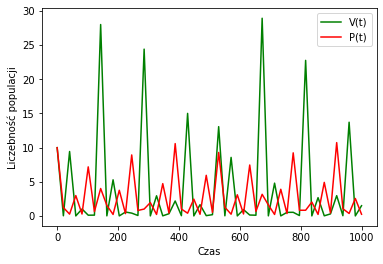

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

r = 1.1
a = 0.4
d = 0.1
s = 0.4

#Utworzenie modelu z opartego na równaniach opisujących V'(t) i P'(t)
def model(z,t):
    V = z[0]
    P = z[1]
    dVdt = r*V-a*V*P
    dPdt = -s*P+d*P*V
    dzdt = [dVdt,dPdt]
    return dzdt

#Warunek początkowy
z0 = [10,10]

#Utworzenie przedziału czasowego t
t = np.linspace(0,1000)

#Numeryczne rozwiązanie modelu na przedziale czasowym t
z = odeint(model,z0,t)

#Graficzne przedstawienie rozwiązania układu
plt.plot(t,z[:,0],'g',label='V(t)')
plt.plot(t,z[:,1],'r',label='P(t)')
plt.ylabel('Liczebność populacji')
plt.xlabel('Czas')
plt.legend(loc='best')
plt.show()

Można zauważyć, że na danym przedziale czasowym wykres się nie stabilizuje i nie dąży do konkretnych wartości, a liczby obu populacji cały czas się wahają.

Szukamy punktów krytycznych poprzez przyrównianie obu równań do zera i rozwiązanie otrzymanego w ten sposób układu:
$$rV-aVP=0$$
$$-sP+dPV=0,$$
gdzie $V$ i $P$ są niewiadomymi. Równania są zapisane w sposób symboliczny (wyrażone wzorami a nie liczbami), przez co można na podstawie nich utworzyć macierz Jacobiego potrzebną do dalszej analizy stabilności wyliczonych punktów krytycznych.

In [2]:
from sympy import *

#Zapisanie równań w sposób symboliczny
V,P,f,g, = symbols('V P f g')
f = r*V-a*V*P
g = -s*P+d*P*V

#Przyrównanie równań do zera i rozwiązanie otrzymanego układu
rozw=solve([Eq(f, 0), Eq(g, 0)],[V,P])
rozw

[(0.0, 0.0), (4.00000000000000, 2.75000000000000)]

Zbadamy stabilność punktu krytycznego $(4,2.75)$ poprzez zbadanie znaku wartości własnych macierzy Jacobiego w tym punkcie.

In [4]:
#Wyznaczenie macierzy Jacobiego
A = Matrix([[diff(f, V), diff(f, P)], [diff(g, V), diff(g, P)]])  
A

Matrix([
[1.1 - 0.4*P,      -0.4*V],
[      0.1*P, 0.1*V - 0.4]])

In [5]:
#Wyznaczenie macierzy Jacobiego w punkcie (4,2.75)
A.subs({V: rozw[1][0], P:rozw[1][1]})


Matrix([
[    0, -1.6],
[0.275,    0]])

In [6]:
#Obliczenie wartości własnych macierzy w punkcie (4,2.75)
A.subs({V: rozw[1][0], P:rozw[1][1]}).eigenvals()


{-0.66332495807108*I: 1, 0.66332495807108*I: 1}

Otrzymano dwie zespolone wartości własne, w związku z czym $\Delta<0$. Części rzeczywiste obu wartości są równe zero, więc badany punkt krytyczny to centrum i jest on stabilny. Nie jest to stabilność strukturalna - drobne odstępstwo wartości od tego punktu bardzo szybko go zaburza. Z tego powodu nasz model o takich warunkach początkowych nie dąży na tym przedziale czasowym do tego punktu mimo jego stabilności. Można to zaobserwować na portrecie fazowym - wartości bliskie punktowi krytycznemu będą wokół niego krążyć, ale go nie osiągną.

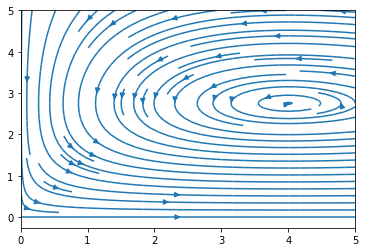

In [7]:
#Portret fazowy dla punktu (4,2.75)
import numpy as np
from sympy import *

fl = lambdify((V,P), f)
gl = lambdify((V,P), g)

import matplotlib.pyplot as plt

Y, X = np.mgrid[0:5:100j, 0:5:100j]

U = fl(X, Y)
W = gl(X, Y)

plt.streamplot(X, Y, U, W)
plt.show()

Badamy stabilność drugiego punktu krytycznego $(0,0)$ w taki sam sposób.

In [8]:

#Wyznaczenie macierzy Jacobiego w punkcie (0,0)
A.subs({V: rozw[0][0], P:rozw[0][1]})

Matrix([
[1.1,    0],
[  0, -0.4]])

In [80]:
#Obliczenie wartości własnych macierzy w punkcie (0,0)
A.subs({V: rozw[0][0], P:rozw[0][1]}).eigenvals()

{1.10000000000000: 1, -0.400000000000000: 1}

Otrzymano dwie rzeczywiste wartości własne, w związku z czym $\Delta>0$. Pierwsza wartość jest dodatnia, a drugia ujemna, więc badany punkt krytyczny jest siodłem i jest on niestabilny. Z tego powodu nasz model nie dąży do śmierci obu populacji. Zachowanie wokół tego punktu jest przedstawione na poniższym portrecie fazowym.

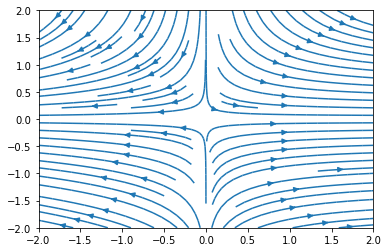

In [81]:
#Portret fazowy dla punktu (0,0)
import numpy as np
from sympy import *

fl = lambdify((V,P), f)
gl = lambdify((V,P), g)

import matplotlib.pyplot as plt

Y, X = np.mgrid[-2:2:100j, -2:2:100j]

U = fl(X, Y)
W = gl(X, Y)

plt.streamplot(X, Y, U, W)
plt.show()

Wykorzystywane źródła:
<ul>
    <li> https://pl.wikipedia.org/wiki/R%C3%B3wnanie_Lotki-Volterry</li>
    <li> U. Foryś, "Modelowanie matematyczne w biologii i medycynie", Uniwersytet
Warszawski, Warszawa, 2011, dostęp online 10.04.2021r. pod adresem
http://mst.mimuw.edu.pl/lecture.php?lecture=mbm.</li>
<li>
we fragmencie o stabilności strukturalnej $(4,2.75)$ korzystano z http://dydmat.mimuw.edu.pl/sites/default/files/rrz-uklady-autonomiczne.pdf strona 40-41 </li>
     </ul>